In [1]:
import os
import sys
if 'Linux' in os.uname():
    from google.colab import drive
    drive.mount('/ME')
    predir='/ME/My Drive/'
else:
    predir='/Users/amit/Google Drive/'
    

#!pip install ninja
datadirs=predir+'Colab Notebooks/STVAE/'
sys.path.insert(1, datadirs)
sys.path.insert(1, datadirs+'_CODE')
sys.path.insert(1, predir+'Colab Notebooks/pytorch-fid')
from fid_score import *
import torch
#import model_layers
#from model_layers import FALinear, FAConv2d
from aux_colab import seq, copy_to_content, copy_from_content, save_net, train_net, run_net
#from aux_colab import copy_to_content
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


Drive already mounted at /ME; to attempt to forcibly remount, call drive.mount("/ME", force_remount=True).


In [2]:
par_file='pars_tvae_orig'

In [2]:

#copy_to_content('pars_big_res_cl',predir)
copy_to_content(par_file,predir)


In [ ]:
copy_from_content(par_file,predir)

In [ ]:
net=run_net(par_file,device)
save_net(net,par_file,predir)


Printing Args from read in model and input args
{'CONS': True,
 'Diag': False,
 'MM': False,
 'OPT': True,
 'binary_thresh': 1e-06,
 'bn': 'none',
 'cl': None,
 'classify': False,
 'clust': None,
 'conf': 0,
 'cont_training': False,
 'datadirs': '/ME/My Drive/Colab Notebooks/STVAE/',
 'dataset': 'MNIST',
 'decoder_gaus': 'zzuu',
 'del_last': False,
 'edge_dtr': 0.0,
 'edges': False,
 'embedd': False,
 'embedd_layer': None,
 'embedd_type': 'new',
 'enc_layers': ['name:input;num_filters:1',
                'name:dense1;num_units:256',
                'name:non_linearity1;type:relu',
                'name:dense2;num_units:256',
                'name:non_linearity2;type:relu'],
 'erode': False,
 'fa': 0,
 'feats': 0,
 'feats_back': False,
 'filts': 3,
 'fout': <ipykernel.iostream.OutStream object at 0x7fe0fedc9c50>,
 'full_dim': 256,
 'gpu': 1,
 'grad_clip': 0.0,
 'h_factor': 0.2,
 'hdim': 256,
 'hid_dataset': None,
 'hid_drop': 0.0,
 'hid_hid': 256,
 'hid_layers': None,
 'hid_lr': 0.001,


Namespace(batch_size=50, channels=3, device=None, dims=2048, imdim=32, num=None, path=None)


Downloading: "https://github.com/mseitzer/pytorch-fid/releases/download/fid_weights/pt_inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/pt_inception-2015-12-05-6726825d.pth


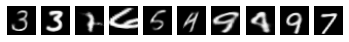

100%|██████████| 200/200 [00:23<00:00,  8.44it/s]


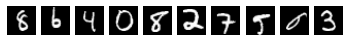

100%|██████████| 200/200 [00:23<00:00,  8.44it/s]


FID:  26.03036431757465


In [8]:

args=setup_parser()
args.path=[predir+'Colab Notebooks/STVAE/_Samples/OUT_s16_tvae_d256_d256_mx10.npy',
           datadirs+'MNIST_data.npy']
args.imdim=28
args.channels=1
args.show=True
args.num=np.array([0, 10000, 50000, 60000])
args.num=args.num.reshape((2,2))
fid_value = calculate_fid_given_paths(args,
                                      device)

print('FID: ', fid_value)


In [ ]:
seq('pars_layerwise_cifar',predir,device)

In [ ]:
#import tex
reload(tex)
tex.make_tex('save/')

In [ ]:
#logi=[[False, 0], [False, 1], [False, 2],
#      [True, 0], [True, 1], [True, 2]]

#cori=[True,False]
fname='pars_emb_cifar'
cori=[True]
logi=[[True,0]]
for ll in logi:
  for cco in cori:
    copy_to_content(fname,predir)
    if ll[0]:
      os.system("echo --layerwise > temp.txt")
    os.system("echo --fa="+str(ll[1])+" >>temp.txt")
    if cco:
      os.system("echo --hinge>> temp.txt")
    os.system("cat "+fname+".txt >> temp.txt")
    os.system("mv temp.txt "+fname+".txt")
    #os.system("cp pars_big_cl.txt try"+str(ll[0])+str(ll[1])+str(cco)+".txt")
    seq(fname,predir,device)
    